### Guided Project: Profitable App Profiles for the App Store and Google Play Markets
See [solution notebook](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb)

For this project, we'll pretend we're working as data analysts for a company that builds Android and iOS mobile apps. We make our apps available on Google Play and in the App Store.

We only build apps that are **free to download and install**, and our main source of revenue consists of **in-app ads**. This means that the number of users of our apps determines our revenue for any given app — the more users who see and engage with the ads, the better. **Our goal for this project is to analyze data to help our developers understand what type of apps are likely to attract more users**.

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load App Store Dataset

In [45]:
data_app = pd.read_csv('./data/AppleStore.csv')
print(data_app.shape)
data_app.head()

(7197, 16)


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [46]:
data_app.dtypes

id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [47]:
z = data_app.isnull().sum()
print(f'Columns with missing values:\n{z[z > 0]}')

Columns with missing values:
Series([], dtype: int64)


In [48]:
df_app = data_app.copy()

In [49]:
df_app.rename(columns = {'sup_devices.num': 'sup_devices_num', 
                         'ipadSc_urls.num': 'ipadSc_urls_num',
                        'lang.num': 'lang_num'}, inplace = True)

### Checking for Duplicates

In [50]:
print(f'Number of duplicate rows: {df_app.duplicated().sum()}')

Number of duplicate rows: 0


### Removing Non-English Apps
If we're going to use the function we've created, we'll lose useful data since many English apps (like `'Docs To Go™ Free Office Suite'` or `'Instachat 😜'`) will be incorrectly labeled as non-English. To minimize the impact of data loss, we'll only remove an app **if its name has more than three characters** with corresponding numbers falling outside the ASCII range. 

#### Helper function to check for non-Englsh names

In [51]:
def check_three_non_ascii(name):
    eng_codes = list(range(128))
    conditions = [(ord(char) not in eng_codes) for char in name]
    if sum(conditions) > 3:
        return True
    return False

In [52]:
df_app.loc[df_app.track_name.apply(check_three_non_ascii)].head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
813,445375097,爱奇艺PPS -《欢乐颂2》电视剧热播,224617472,USD,0.0,14844,0,4.0,0.0,6.3.3,17+,Entertainment,38,5,3,1
1193,405667771,"聚力视频HD-人民的名义,跨界歌王全网热播",90725376,USD,0.0,7446,8,4.0,4.5,5.0.8,12+,Entertainment,24,4,1,1
1427,336141475,优酷视频,204959744,USD,0.0,4885,0,3.5,0.0,6.7.0,12+,Entertainment,38,0,2,1
1518,425349261,网易新闻 - 精选好内容，算出你的兴趣,133134336,USD,0.0,4263,6,4.5,1.0,23.2,17+,News,37,4,2,1
1595,387682726,淘宝 - 随时随地，想淘就淘,309673984,USD,0.0,3801,6,4.0,4.0,6.7.2,4+,Shopping,37,1,1,1


In [53]:
df = df_app.loc[~df_app.track_name.apply(check_three_non_ascii)]
print(df.shape)
df.head()

(6183, 16)


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


### Isolating the Free Apps
Our client only builds apps that are free to download and install. Our datasets contain both free and non-free apps; we'll need to isolate only the free apps for our analysis.

#### Helper function to clean price

In [54]:
def clean_price(price):
    if '$' in price:
        price = float(price[1:])
    else:
        price = float(price)
    return price

**The `price` column in App Store dataset is already clean and in `float` data type**.

In [55]:
df_free_app = df.loc[df.price == 0.0]
print(df_free_app.shape)
df_free_app.head()

(3222, 16)


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


## Most Common Apps by Genre
We'll need to build a frequency table for the **prime_genre** column of the **App Store** dataset.

In [56]:
df_free_app.prime_genre.value_counts(normalize = True, ascending = False) * 100

prime_genre
Games                58.162632
Entertainment         7.883302
Photo & Video         4.965860
Education             3.662322
Social Networking     3.289882
Shopping              2.607076
Utilities             2.513966
Sports                2.141527
Music                 2.048417
Health & Fitness      2.017381
Productivity          1.738051
Lifestyle             1.582868
News                  1.334575
Travel                1.241465
Finance               1.117318
Weather               0.869025
Food & Drink          0.806952
Reference             0.558659
Business              0.527623
Book                  0.434513
Navigation            0.186220
Medical               0.186220
Catalogs              0.124146
Name: proportion, dtype: float64

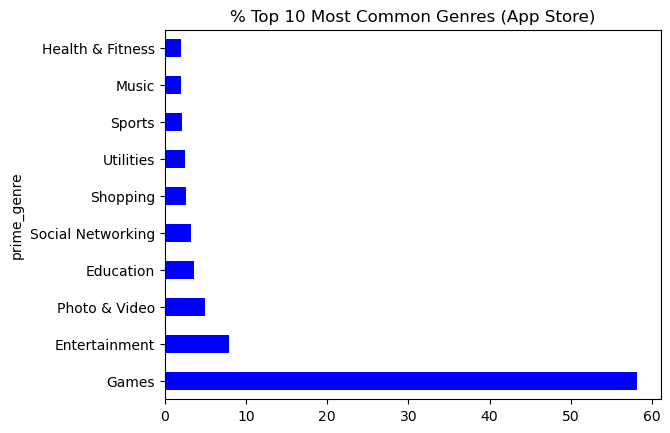

In [57]:
genre = df_free_app.prime_genre.value_counts(normalize = True, ascending = False) * 100
genre.head(10).plot(kind = 'barh', color = 'b')
plt.title('% Top 10 Most Common Genres (App Store)');

#### Analyze the frequency table generated for the `prime_genre` column of the App Store dataset
* What is the **most common genre**?: **Games with `58.16%`** 
* What is the **next most common?**: **Entertainment with `7.88%`**
* What other patterns do you see?: Photo & Video, Social Networking, Education
* What is the general impression?: Most of the apps are designed more for entertainment (games, photo and video, social networking, sports, music).
* Can you recommend an app profile for the App Store market based on this frequency table alone?: Based on the frequency table I would recommend **Gamming apps** for App Store.
* If there's a large number of apps for a particular genre, does that also imply that apps of that genre generally have a large number of users?: Not necessarily. Further analysis on the **number of users** and **number of downloads** is required.

### Most Popular Apps by Genre on the App Store
Now, we'd like to determine the kind of apps with the most users. For the **Google Play** data set, we can find this information in the **`Installs`** column, but *this information is missing for the App Store* data set. As a workaround, we'll take the **total number of user ratings** as a proxy, which we can find in the **`rating_count_tot`** app.
#### Average **`rating_count_tot`** by Genres

In [58]:
df_free_app.groupby('prime_genre').rating_count_tot.mean().sort_values(ascending = False)

prime_genre
Navigation           86090.333333
Reference            74942.111111
Social Networking    71548.349057
Music                57326.530303
Weather              52279.892857
Book                 39758.500000
Food & Drink         33333.923077
Finance              31467.944444
Photo & Video        28441.543750
Travel               28243.800000
Shopping             26919.690476
Health & Fitness     23298.015385
Sports               23008.898551
Games                22788.669691
News                 21248.023256
Productivity         21028.410714
Utilities            18684.456790
Lifestyle            16485.764706
Entertainment        14029.830709
Business              7491.117647
Education             7003.983051
Catalogs              4004.000000
Medical                612.000000
Name: rating_count_tot, dtype: float64

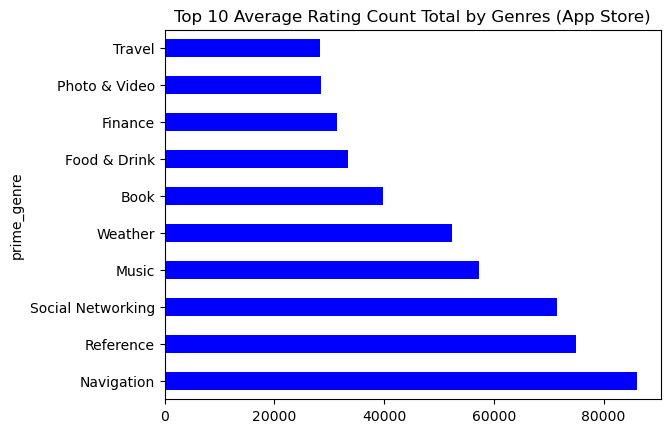

In [59]:
genre_rcnt = df_free_app.groupby('prime_genre').rating_count_tot.mean().sort_values(ascending = False)
genre_rcnt.head(10).plot(kind = 'barh', color = 'b')
plt.title('Top 10 Average Rating Count Total by Genres (App Store)');

#### Analyze the results and try to come up with at least one app profile recommendation for the App Store.

Top 5 genres in App Store are:

    ----------------------------------------------
    | GENRES              | AVERAGE RATING COUNT |
    ----------------------------------------------
    | Navigation          |      86090           |
    ----------------------------------------------
    | Reference           |      74942           |
    ----------------------------------------------
    | Social Networking   |      71548           |
    ----------------------------------------------
    | Music               |      57326           |
    ----------------------------------------------
    | Weather             |      52279           |
    ----------------------------------------------
    
These are our **top 5 genres** recommendations for **APP Store**.

#### Average **`user_rating`** by Genres

In [60]:
df_free_app.groupby('prime_genre').user_rating.mean().sort_values(ascending = False)

prime_genre
Catalogs             4.125000
Games                4.037086
Productivity         4.000000
Business             3.970588
Shopping             3.970238
Music                3.946970
Photo & Video        3.903125
Navigation           3.833333
Health & Fitness     3.769231
Reference            3.666667
Education            3.635593
Food & Drink         3.634615
Social Networking    3.594340
Entertainment        3.539370
Utilities            3.530864
Travel               3.487500
Weather              3.482143
Lifestyle            3.411765
Finance              3.375000
News                 3.244186
Book                 3.071429
Sports               3.065217
Medical              3.000000
Name: user_rating, dtype: float64

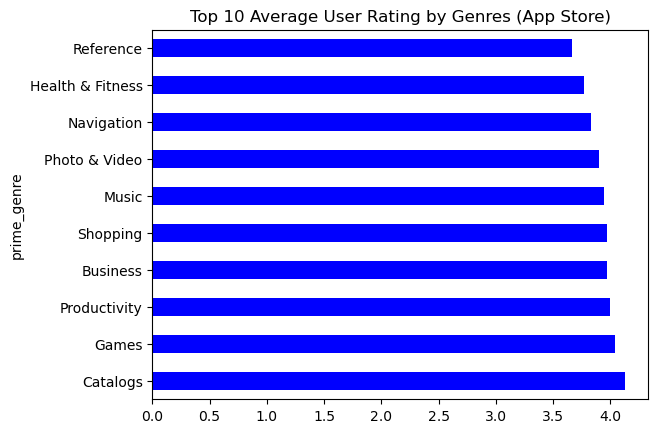

In [61]:
genre_uratg = df_free_app.groupby('prime_genre').user_rating.mean().sort_values(ascending = False)
genre_uratg.head(10).plot(kind = 'barh', color = 'b')
plt.title('Top 10 Average User Rating by Genres (App Store)');

#### Analyze the results and try to come up with at least one app profile recommendation for the App Store.

Top 5 genres in App Store are:

    ----------------------------------------------
    | GENRES              |  AVERAGE USER RATING |
    ----------------------------------------------
    | Catalogs            |       4.13           |
    ----------------------------------------------
    | Games               |       4.04           |
    ----------------------------------------------
    | Productivity        |       4.00           |
    ----------------------------------------------
    | Business            |       3.97           |
    ----------------------------------------------
    | Shopping            |       3.97           |
    ----------------------------------------------
    
These are our **top 5 genres** recommendations for **APP Store**.

### Load Google Play Dataset

In [62]:
data_goog = pd.read_csv('./data/googleplaystore.csv', parse_dates = ['Last Updated'])
print(data_goog.shape)
data_goog.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [63]:
data_goog.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [64]:
z = data_goog.isnull().sum()
print(f'Columns with missing values:\n{z[z > 0]}')

Columns with missing values:
Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64


### Drop rows with missing values

In [65]:
df = data_goog.copy()
df.dropna(inplace = True)
df.shape

(9360, 13)

### Remove duplicate data

In [66]:
df.duplicated().sum()

474

In [67]:
print(f'Shape Before dropping duplicates = {df.shape}')
df.drop_duplicates(keep = 'first', inplace = True)
print(f"Shape After dropping duplicates = {df.shape}")

Shape Before dropping duplicates = (9360, 13)
Shape After dropping duplicates = (8886, 13)


### Checking and Removing Non-English Apps

In [68]:
df.loc[df.App.apply(check_three_non_ascii)].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
710,Flame - درب عقلك يوميا,EDUCATION,4.6,56065,37M,"1,000,000+",Free,0,Everyone,Education,"July 26, 2018",3.3,4.1 and up
1592,သိင်္ Astrology - Min Thein Kha BayDin,LIFESTYLE,4.7,2225,15M,"100,000+",Free,0,Everyone,Lifestyle,"July 26, 2018",4.2.1,4.0.3 and up
3750,РИА Новости,NEWS_AND_MAGAZINES,4.5,44274,8.0M,"1,000,000+",Free,0,Everyone,News & Magazines,"August 6, 2018",4.0.6,4.4 and up
4193,صور حرف H,ART_AND_DESIGN,4.4,13,4.5M,"1,000+",Free,0,Everyone,Art & Design,"March 27, 2018",2.0,4.0.3 and up
4324,"L.POINT - 엘포인트 [ 포인트, 멤버십, 적립, 사용, 모바일 카드, 쿠폰,...",LIFESTYLE,4.0,45224,49M,"5,000,000+",Free,0,Everyone,Lifestyle,"August 1, 2018",6.5.1,4.1 and up


In [69]:
df = df.loc[~df.App.apply(check_three_non_ascii)]
print(df.shape)
df.head()

(8856, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Isolating the Free Apps
Our client only builds apps that are free to download and install. Our datasets contain both free and non-free apps; we'll need to isolate only the free apps for our analysis.

In [70]:
df['Price'] = df.Price.apply(clean_price)

In [71]:
df_free_goog = df.loc[df.Price == 0.0]
print(df_free_goog.shape)

(8247, 13)


### Most Common Apps by `Genre` (Google Play)

In [72]:
df_free_goog.Genres.value_counts(normalize = True, ascending = False) * 100

Genres
Tools                          8.112041
Entertainment                  5.844550
Education                      5.153389
Action                         3.940827
Productivity                   3.819571
                                 ...   
Casual;Music & Video           0.012126
Health & Fitness;Education     0.012126
Music & Audio;Music & Video    0.012126
Strategy;Action & Adventure    0.012126
Strategy;Creativity            0.012126
Name: proportion, Length: 113, dtype: float64

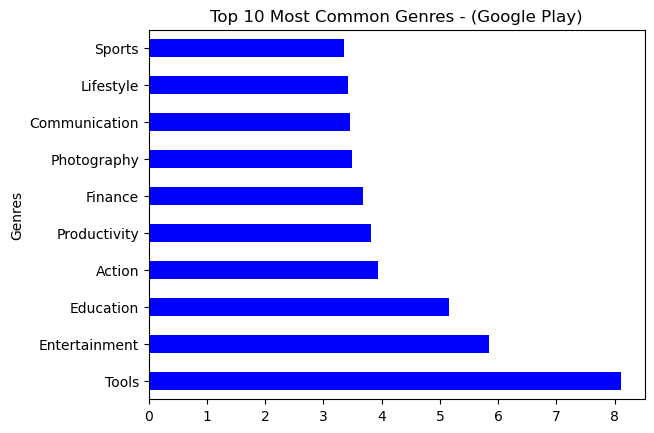

In [73]:
genre_gop = df_free_goog.Genres.value_counts(normalize = True, ascending = False) * 100
genre_gop.head(10).plot(kind = 'barh', color = 'b')
plt.title('Top 10 Most Common Genres - (Google Play)');

### Most Common Apps by `Category` (Google Play)

In [74]:
df_free_goog.Category.value_counts(normalize = True, ascending = False) * 100

Category
FAMILY                 18.794713
GAME                   12.064993
TOOLS                   8.124166
PRODUCTIVITY            3.819571
FINANCE                 3.686189
PHOTOGRAPHY             3.492179
COMMUNICATION           3.455802
LIFESTYLE               3.431551
SPORTS                  3.201164
BUSINESS                3.152662
HEALTH_AND_FITNESS      3.043531
PERSONALIZATION         2.946526
SOCIAL                  2.934400
MEDICAL                 2.885898
NEWS_AND_MAGAZINES      2.522129
SHOPPING                2.425124
TRAVEL_AND_LOCAL        2.388747
BOOKS_AND_REFERENCE     2.024979
VIDEO_PLAYERS           1.891597
DATING                  1.879471
EDUCATION               1.503577
MAPS_AND_NAVIGATION     1.430823
ENTERTAINMENT           1.321693
FOOD_AND_DRINK          1.261065
AUTO_AND_VEHICLES       0.873045
HOUSE_AND_HOME          0.824542
WEATHER                 0.824542
LIBRARIES_AND_DEMO      0.776040
COMICS                  0.691160
ART_AND_DESIGN          0.691160
P

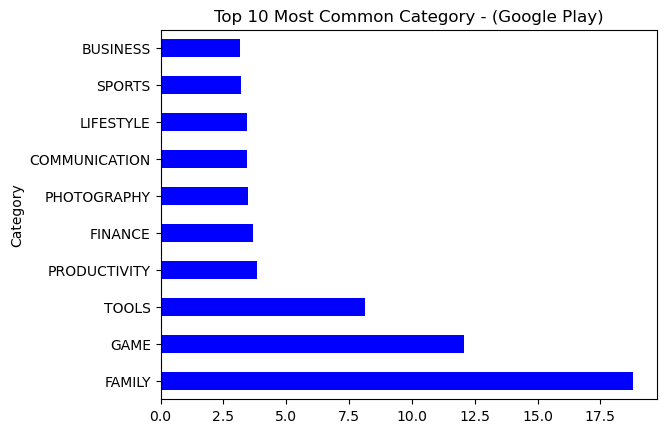

In [75]:
category = df_free_goog.Category.value_counts(normalize = True, ascending = False) * 100
category.head(10).plot(kind = 'barh', color = 'b')
plt.title('Top 10 Most Common Category - (Google Play)');

#### Analyze the frequency table you generated for the Category and Genres column of the Google Play dataset.
#### Category
* What are the **most common genres**?: **FAMILY (`18.78%`)**
* What other patterns do you see?: **Games (`12.06%`), TOOLS (`8.12%`)** 
* Compare the patterns you see for the Google Play market with those you saw for the App Store market: **The patterns are very similar except for the fact that no app stands out as the most popular in Google Play as Games is in App Store**.
* Can you recommend an app profile based on what you found so far? **No convincing recommendation can be made! No app stands out as the most popular in Google Play as Games is in App Store**. 
* Do the frequency tables you generated reveal the most frequent app genres or what genres have the most users?: **There is no decisive winner in this category!**

#### Genres
* What are the **most common genres**?: **Tools with `8.11%`**
* What other patterns do you see?: **Entertainment, Education, Business with `<6%`**. 
* Compare the patterns you see for the Google Play market with those you saw for the App Store market: **The patterns are very similar except for the fact that no app stands out as the most popular in Google Play as Games is in App Store**.
* Can you recommend an app profile based on what you found so far?: **No recommendation! No app stands out as the most popular in Google Play as Games is in App Store** 
* Do the frequency tables you generated reveal the most frequent app genres or what genres have the most users?: **There is no decisive winner in this category!**

### Most Popular Apps by Genre on the App Store
Now, we'd like to determine the kind of apps with the most users. For the **Google Play** data set, we can find this information in the **`Installs`** column. We'll consider that an app with **100,000+** installs has **100,000** installs, and an app with **1,000,000+** installs has **1,000,000** installs, and so on.

In [76]:
df_free_goog.loc[:,'Installs'] = df_free_goog.Installs.str.replace('\D', '', regex = True).astype(float)

In [82]:
df_free_goog['Installs'].dtypes

dtype('O')

### Average Installs by `Genres` (Google Play)

In [78]:
df_free_goog.groupby('Genres').Installs.mean().sort_values(ascending = False)

Genres
Communication                   84739935.192982
Adventure;Action & Adventure    82363636.363636
Social                          51710063.946281
Arcade                          51678938.909574
Casual                          49220152.613636
                                     ...       
Card;Brain Games                       100000.0
Puzzle;Education                       100000.0
Comics;Creativity                       50000.0
Books & Reference;Education              1000.0
Simulation;Education                      500.0
Name: Installs, Length: 113, dtype: object

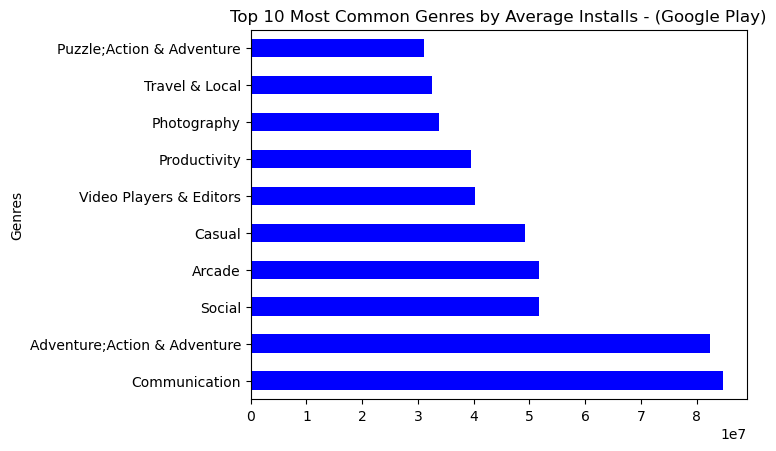

In [79]:
genre_install = df_free_goog.groupby('Genres').Installs.mean().sort_values(ascending = False)
genre_install.head(10).plot(kind = 'barh', color = 'b')
plt.title('Top 10 Most Common Genres by Average Installs - (Google Play)');

#### Analyze the results, and try to come up with at least one app profile recommendation for Google Play.

Top 3 Genres in Google Play are: 

    -------------------------------------------------
    | GENRES           | AVERAGE NUMBER OF INSTALLS |
    -------------------------------------------------
    | Communication    |        84,739,940          |
    -------------------------------------------------
    | Adventure;Action |                            |
    | & Adventure      |        82,363,640          |
    -------------------------------------------------
    | Social           |        51,710,060          |
    -------------------------------------------------
    
These are our **top 3 Genres** recommendations for **Google Play**. 


### Average Installs by `Category` (Google Play)

In [80]:
df_free_goog.groupby('Category').Installs.mean().sort_values(ascending = False)

Category
COMMUNICATION          84739935.192982
SOCIAL                 51710063.946281
VIDEO_PLAYERS          39883501.282051
PRODUCTIVITY           39560664.666667
PHOTOGRAPHY              33747446.5625
TRAVEL_AND_LOCAL       32292778.172589
GAME                   31681114.025126
NEWS_AND_MAGAZINES     25923505.528846
ENTERTAINMENT          22527155.963303
TOOLS                  17087309.970149
SHOPPING                    12866607.2
BOOKS_AND_REFERENCE    11474305.419162
PERSONALIZATION         8518865.884774
FAMILY                  6453840.490323
WEATHER                 6254191.176471
MAPS_AND_NAVIGATION     6135986.949153
SPORTS                  5785180.549242
HEALTH_AND_FITNESS      5420451.075697
EDUCATION               4292338.709677
BUSINESS                3320213.307692
FINANCE                 2533311.842105
FOOD_AND_DRINK          2478055.288462
ART_AND_DESIGN          2179142.105263
LIFESTYLE               1867144.911661
HOUSE_AND_HOME          1839441.176471
DATING          

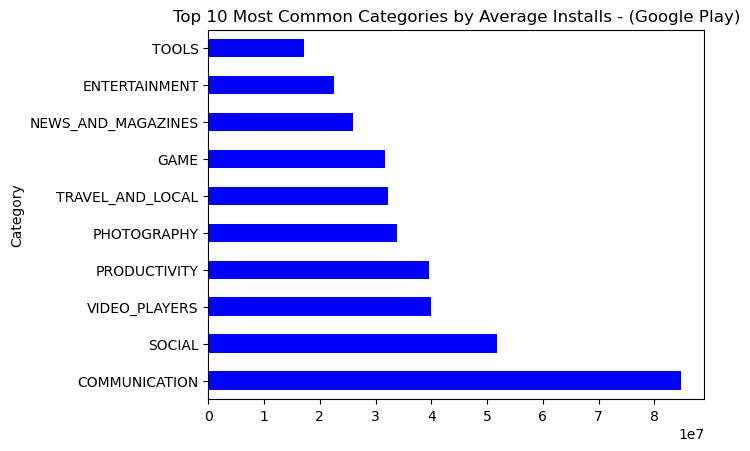

In [81]:
cat_install = df_free_goog.groupby('Category').Installs.mean().sort_values(ascending = False)
cat_install.head(10).plot(kind = 'barh', color = 'b')
plt.title('Top 10 Most Common Categories by Average Installs - (Google Play)');

#### Analyze the results, and try to come up with at least one app profile recommendation for Google Play.

Top 3 Categories in Google Play are: 

    -----------------------------------------------
    | CATEGORY       | AVERAGE NUMBER OF INSTALLS |
    -----------------------------------------------
    | COMMUNICATION  |          84,739,940        |
    -----------------------------------------------
    | SOCIAL         |          51,710,060        |
    -----------------------------------------------
    | VIDEO_PLAYERS  |          39,883,500        |
    -----------------------------------------------
    
These are our **top 3 Categories** recommendations for **Google Play**. 
